In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load Dataset
dataset = pd.read_csv('./Dataset-finalproj.csv')
dataset.head()

V1       V2       V3        V4  Classification
0 -2.25010  3.31290 -0.88369 -2.897400               1
1  0.26637  0.73252 -0.67891  0.035330               1
2  4.79650  6.98590 -1.99670 -0.350010               0
3  0.75736  3.02940  2.91640 -0.068117               0
4 -1.72630 -6.02370  5.24190  0.295240               1

In [3]:
# Overview of Dataset Characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
V1                1372 non-null float64
V2                1372 non-null float64
V3                1372 non-null float64
V4                1372 non-null float64
Classification    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
#Summary of N/A Values
dataset.isnull().sum()

V1                0
V2                0
V3                0
V4                0
Classification    0
dtype: int64

In [5]:
#Basic Statistics
dataset.describe()

V1           V2           V3           V4  Classification
count  1372.000000  1372.000000  1372.000000  1372.000000     1372.000000
mean      0.433735     1.922353     1.034653    -1.429995        0.444606
std       2.842763     5.869047     4.336832     2.110059        0.497103
min      -7.042100   -13.773100    -6.261300    -9.048200        0.000000
25%      -1.773000    -1.708200    -1.969525    -2.618650        0.000000
50%       0.496180     2.319650     0.207490    -0.856690        0.000000
75%       2.821475     6.814625     2.935875     0.110653        1.000000
max       6.824800    12.951600    17.677200     2.449500        1.000000

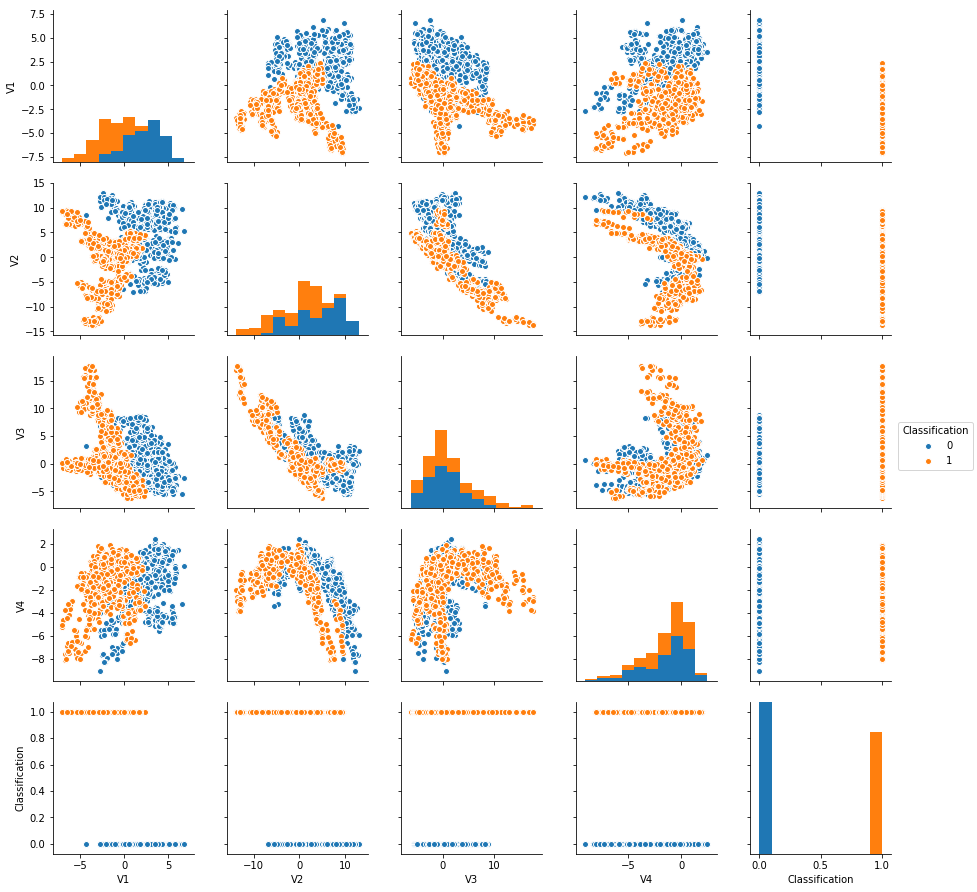

In [5]:
#Visualization of All Variables
pairplot = sns.pairplot(dataset, hue="Classification")
pairplot

In [6]:
#Remove Classification from Dataset for Correlations
dataset2 = dataset.drop('Classification', axis=1)

In [7]:
#Review Correlation between Variables
dataset2.corr()

V1        V2        V3        V4
V1  1.000000  0.264026 -0.376540  0.277930
V2  0.264026  1.000000 -0.781105 -0.522921
V3 -0.376540 -0.781105  1.000000  0.308481
V4  0.277930 -0.522921  0.308481  1.000000

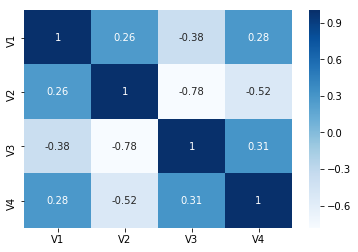

In [8]:
#Visualiztion of Correlations
import seaborn as sns
sns.heatmap(dataset2.corr(),annot=True,cmap="Blues")

In [9]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(dataset2, 0.8)
print('Correlated columns:',col)    

Correlated columns: set()


In [10]:
#Distribution of Classes
dataset['Classification'].value_counts()

0    762
1    610
Name: Classification, dtype: int64

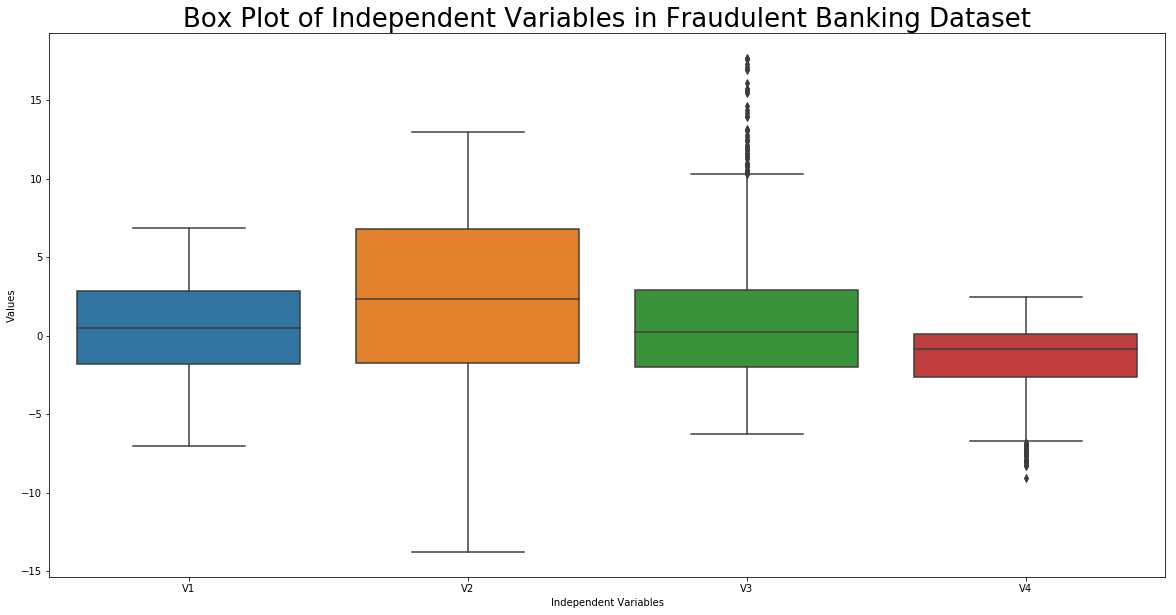

In [11]:
#Box Plot of all Variables
fig, ax = plt.subplots(figsize=(20,10))
ax.set(xlabel='Independent Variables', ylabel='Values')
ax.set_title('Box Plot of Independent Variables in Fraudulent Banking Dataset', fontsize = 26)
sns.boxplot(data=dataset2, ax = ax)

In [21]:
#Create X and y variables
X = dataset.drop('Classification', axis=1).values
y = dataset['Classification'].values

In [22]:
#Scale X variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_2 = sc.fit_transform(X)

DECISION TREE

In [23]:
#Prepare for Model
#Load Library for Training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state = 100)

#Import Model
from sklearn.tree import DecisionTreeClassifier  

In [24]:
# Construct Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])

In [29]:
#Fit Decision Tree without Gridsearch
classifier = pipe_dt.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [30]:
#Evaluate Algorithm
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Classification 0', 'Classification 1']
print (confusion_matrix(y_test, y_pred))
print(classification_report (y_test, y_pred, target_names = target_names))

[[150   3]
 [  3 119]]
                  precision    recall  f1-score   support

Classification 0       0.98      0.98      0.98       153
Classification 1       0.98      0.98      0.98       122

       micro avg       0.98      0.98      0.98       275
       macro avg       0.98      0.98      0.98       275
    weighted avg       0.98      0.98      0.98       275



In [27]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_train, 
                                                            y=y_train,
                                                            cv=10,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring='accuracy',
                                                            n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.01])
    plt.show()

Decision Tree - Learning Curve


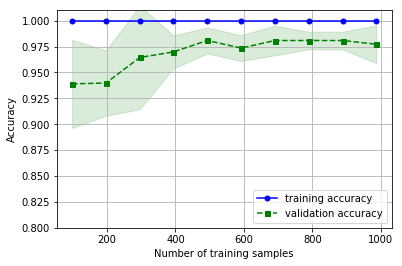

In [37]:
#Plot Learning Curve
print('Decision Tree - Learning Curve')
plot_learning_curves(pipe_dt)

DECISION TREE GRIDSEARCH & NESTED CROSS VALIDATION

In [32]:
#Create table to compare MLA metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_colwidth', -1) 

# Set grid search params 

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}

#Optimize Model
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
opt_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_griddt,
                       cv=cv2, verbose=0,scoring='accuracy',n_jobs=-1)

# List of pipelines for ease of iteration 
grids = [opt_dt] 

# Dictionary of pipelines and classifier types for ease of reference 
grid_dict = {0:'dt'}

#Create Dataframe for MLA Analysis
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for idx, gs in enumerate(grids):
    
    #Fit grid search
    gs.fit(X_train, y_train)
    
    # Nested CV
    scoresNestedPre = cross_val_score(gs, X_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoresNestedRec = cross_val_score(gs, X_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    #Create Dataframe to Compare Models
    MLA_compare.loc[row_index,'Algorithm Name'] = grid_dict[idx]
    MLA_compare.loc[row_index,'Train Accuracy'] = round(gs.best_score_, 2)
    MLA_compare.loc[row_index,'Precision-NestedCV'] = str('{:0.2f} +/- {:0.2f} '.format(np.mean(scoresNestedPre),
                                                                           np.std(scoresNestedPre)))
    MLA_compare.loc[row_index,'Recall-NestedCV'] = str('{:0.2f} +/- {:0.2f} '.format(np.mean(scoresNestedRec),
                                                                           np.std(scoresNestedRec)))
    
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(gs.best_params_)     
    row_index+=1
    
MLA_compare.sort_values(by = ['Precision-NestedCV'], ascending = False, inplace = True)    
MLA_compare

Algorithm Name  Train Accuracy Precision-NestedCV Recall-NestedCV  \
0  dt             0.99            0.98 +/- 0.01      0.98 +/- 0.01    

                                       MLA Parameters  
0  {'clf__criterion': 'entropy', 'clf__max_depth': 8}

In [33]:
#Feature Importance - optimized
for name, score in zip(list(dataset),opt_dt.best_estimator_.named_steps['clf'].feature_importances_):
    print(name, round(score,2))

V1 0.59
V2 0.28
V3 0.13
V4 0.01


BAGGING METHOD - RANDOM FOREST

In [35]:
#Import Model and Create Random Forest Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])

In [36]:
#Set Gridsearch Parameters
param_gridrdf = {'clf__n_estimators': [100,150,200],
                 'clf__max_features': ['auto', 'log2', 'sqrt'],
                 'clf__bootstrap': [True, False]}


Random Forest - Learning Curve


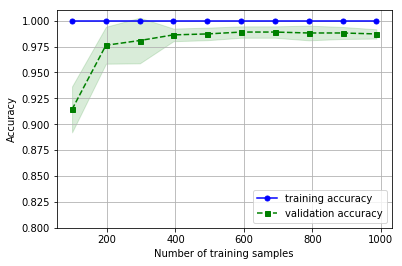

In [43]:
#Plot Learning Curve
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)

In [48]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2)
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, X_2, y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, X_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, X_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(X_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(model.named_steps['clf']))
    print('\n')
    
    #Feature Importance - optimized
    print('Feature Importances')
    for name, score in zip(list(dataset),gs_clf.best_estimator_.named_steps['clf'].feature_importances_):
        print(name, round(score,2))
    
    #Output Validation Statistics
    target_names=['Classification 0','Classification 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreRM)))
    print('\n')
    
Gridsearch_cv(pipe_rdf,param_gridrdf)


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)


Feature Importances
V1 0.57
V2 0.24
V3 0.14
V4 0.05

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 200}

 [[152   1]
 [  2 120]]

                   precision    recall  f1-score   support

Classification 0       0.99      0.99      0.99       153
Classification 1       0.99      0.98      0.99       122

       micro avg       0.99      0.99      0.99       275
       macro avg       0.99      0.99      0.99       275
    weighted avg       0.99      0.99      0.99       275


NestedCV Accuracy(weighted)

BOOSTING METHOD - ADABOOST

In [50]:
#Import Model and Create Adaboost Pipeline
from sklearn.ensemble import AdaBoostClassifier
pipe_ada = Pipeline([('scl', StandardScaler()),
                    ('clf', AdaBoostClassifier(random_state=100))])

#Will not tune Hyperparameters
param_gridada = {}

In [51]:
#Run Gridsearch Cross Validation
Gridsearch_cv(pipe_ada,param_gridada)


Optimized Model

Model Name: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=100)


Feature Importances
V1 0.26
V2 0.34
V3 0.34
V4 0.06

Best Parameters: {}

 [[150   3]
 [  0 122]]

                   precision    recall  f1-score   support

Classification 0       1.00      0.98      0.99       153
Classification 1       0.98      1.00      0.99       122

       micro avg       0.99      0.99      0.99       275
       macro avg       0.99      0.99      0.99       275
    weighted avg       0.99      0.99      0.99       275


NestedCV Accuracy(weighted) :0.99 +/-0.01 
NestedCV Precision(weighted) :0.99 +/-0.01 
NestedCV Recall(weighted) :0.99 +/-0.01 




BOOSTING METHOD - GRADIENT BOOSTING

In [53]:
#Import Model and Create Gradient Boost Pipeline
from sklearn.ensemble import GradientBoostingClassifier
pipe_gbc = Pipeline([('scl', StandardScaler()),
                    ('clf', GradientBoostingClassifier(random_state=100))])

#Will not tune Hyperparameters
param_gridgbc = {}

In [54]:
#Run Gridsearch Cross Validation
Gridsearch_cv(pipe_gbc,param_gridgbc)


Optimized Model

Model Name: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=100,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


Feature Importances
V1 0.66
V2 0.25
V3 0.09
V4 0.0

Best Parameters: {}

 [[151   2]
 [  2 120]]

                   precision    recall  f1-score   support

Classification 0       0.99      0.99      0.99       153
Classification 1       0.98      0.98      0.98       122

       micro avg       0.99      0.99      0.99       275
       macro avg       0.99      0.99      0.99       275
    weighted avg       0.99      